In [1]:
from google.cloud import bigquery
from src.config import Config
from src.data.big_query_loader import BigQueryLoader

assignment_activity = BigQueryLoader.load_data(
    query_file="assignment_activity.sql", parquet_file="assignment_activity"
)
historical_activity = BigQueryLoader.load_data(
    query_file="historical_activity.sql", parquet_file="historical_activity"
)

DATA EXIST, IS LOADING FROM LOCAL ...
DATA EXIST, IS LOADING FROM LOCAL ...


In [2]:
from src.data.feature_extraction import get_assignment_features


assignment_activity = get_assignment_features(assignment_activity, "treatment")
historical_activity = get_assignment_features(historical_activity, "pre-treatment")

In [12]:
from src.utility.plot import plot_stats
from src.utility.statistics import calc_ttest


def calc_segment_stat_test(players_segment, title):
    print(players_segment.shape[0] / assignment_activity.shape[0])

    players_segment_aggregated, players_segment_stat_result = calc_ttest(
        players_segment
    )
    plot_stats(
        players_segment_aggregated,
        players_segment_stat_result,
        title,
    )
    return players_segment_aggregated, players_segment_stat_result

## High Engaged Players

0.00011218601467265301


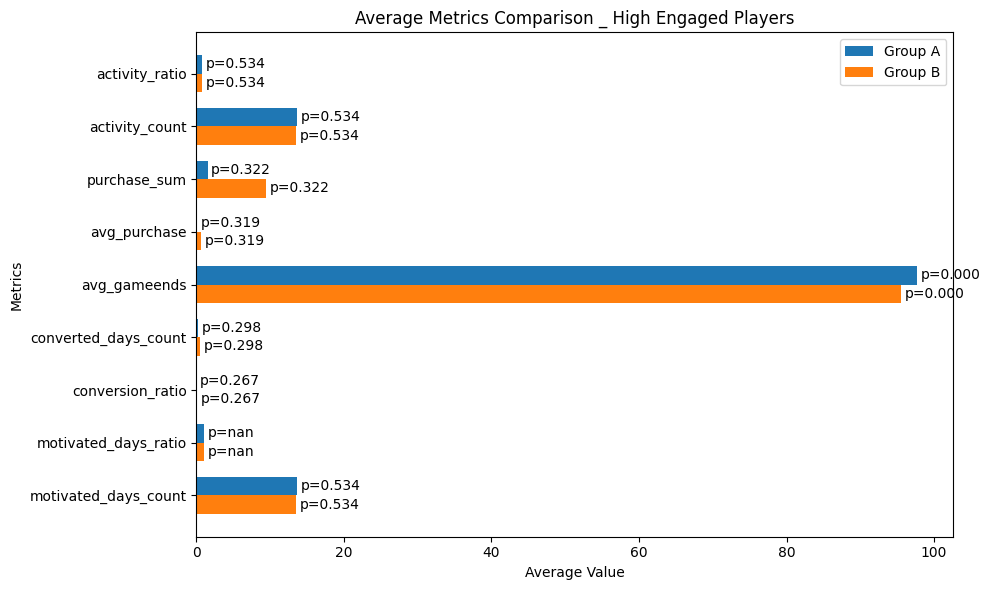

In [13]:
import warnings

warnings.filterwarnings("ignore")

high_engaged_players = assignment_activity[
    assignment_activity.index.isin(
        historical_activity[historical_activity.avg_gameends > 100].index
    )
]

high_engaged_players_aggregated, high_engaged_players_stat_result = (
    calc_segment_stat_test(high_engaged_players, "High Engaged Players")
)

## Old Converted Players

0.022433718295593402


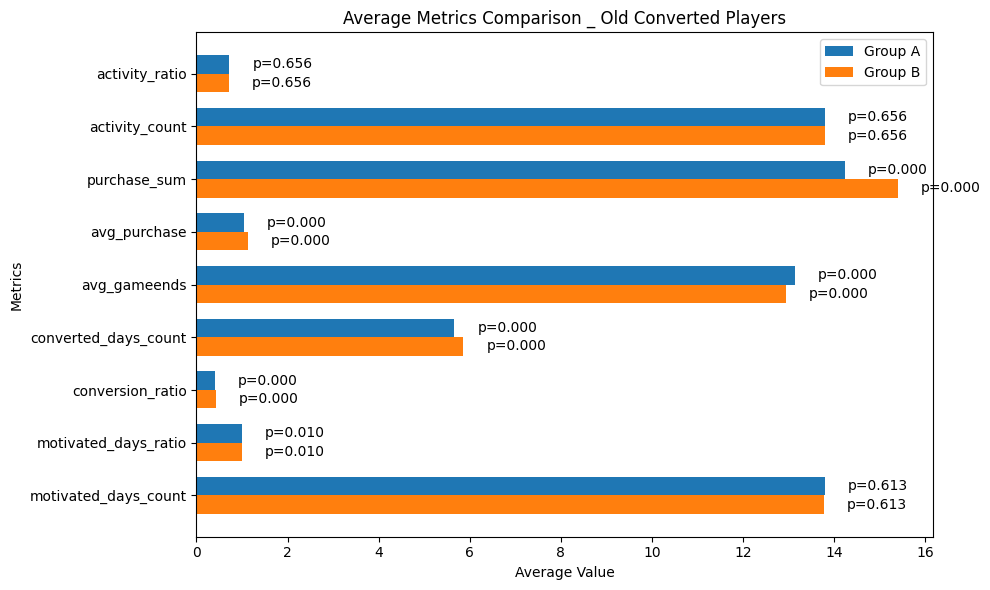

In [14]:
old_converted_players = assignment_activity[
    (assignment_activity["age_in_app"] > 10)
    & (assignment_activity["age_in_app"] > assignment_activity["convert_age"])
    & (assignment_activity["never_converted"] == False)
]


old_converted_players_aggregated, old_converted_players_stat_result = calc_segment_stat_test(
    old_converted_players, "Old Converted Players"
)

## New Players

0.18669156376656945


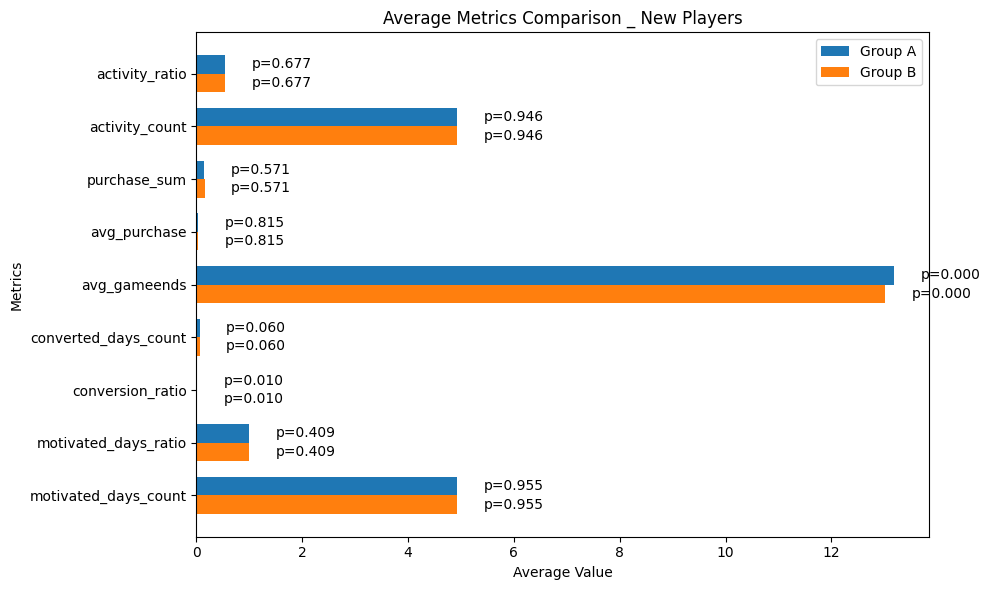

In [15]:
new_players = assignment_activity[(assignment_activity["age_in_app"] < 2)]

new_players_aggregated, new_players_stat_result = calc_segment_stat_test(
    new_players, "New Players"
)

## New Converted Players

0.0014891991680230946


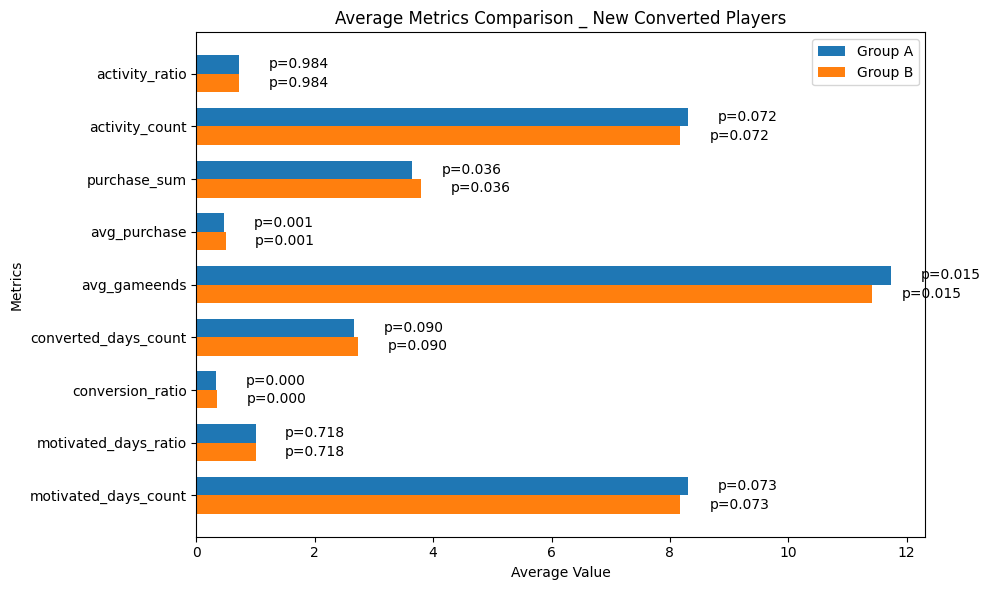

In [16]:
new_converted_players = assignment_activity[
    (assignment_activity["age_in_app"] < 2)
    & (assignment_activity["age_in_app"] < assignment_activity["convert_age"])
    & (assignment_activity["never_converted"] == False)
]
new_converted_players_aggregated, new_converted_players_stat_result = calc_segment_stat_test(
    new_converted_players, "New Converted Players"
)

## Never Converted Players

0.9723239328099664


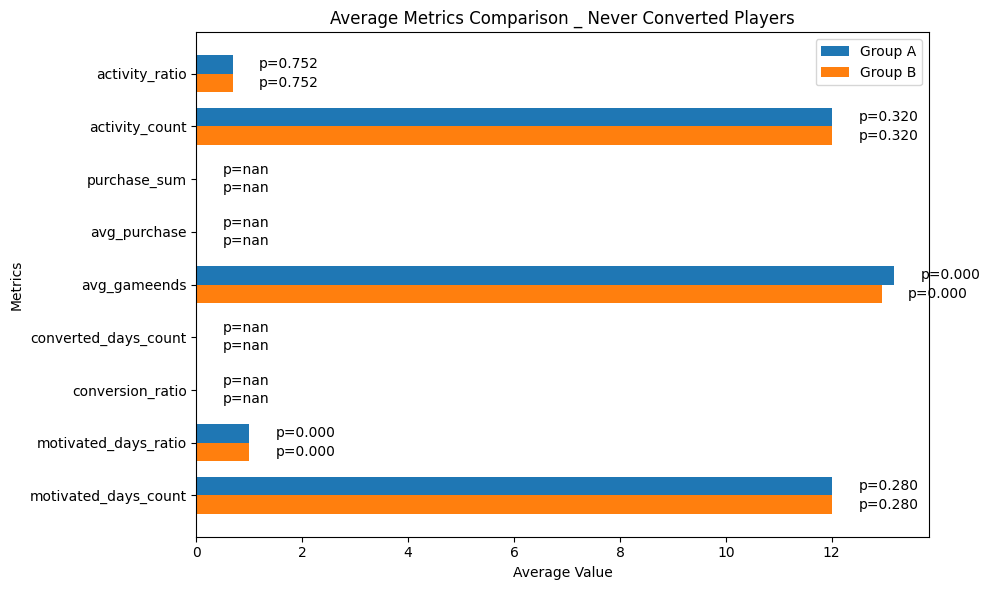

In [17]:
never_converted_players = assignment_activity[assignment_activity["never_converted"]]
never_converted_players_aggregated, never_converted_players_stat_result = calc_segment_stat_test(
    never_converted_players, "Never Converted Players"
)

### Active Players

0.40752823331903343


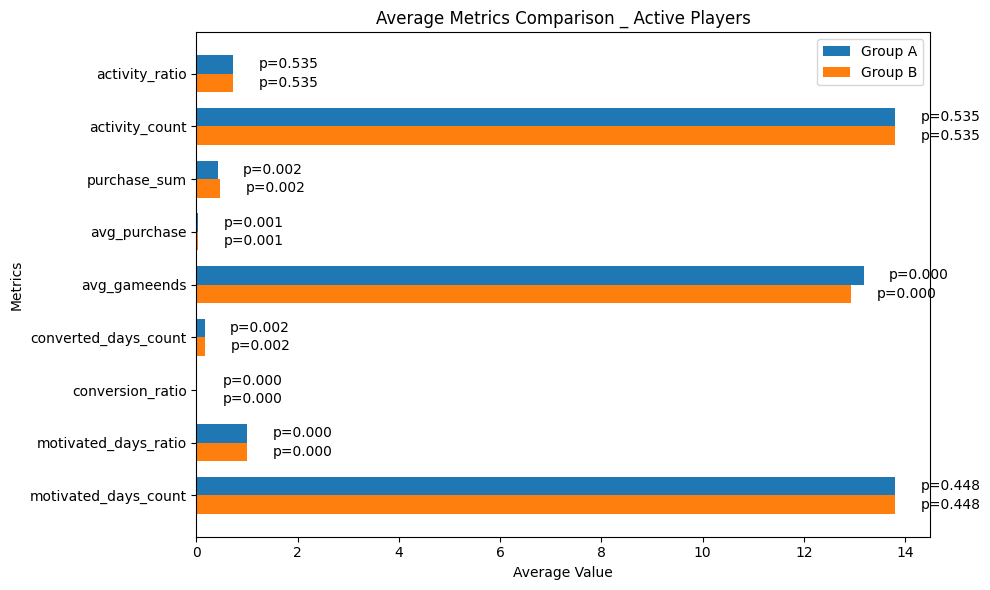

In [18]:
active_players = assignment_activity[
    assignment_activity.index.isin(
        historical_activity[historical_activity.activity_count > 10].index
    )
]

active_players_aggregated, active_players_stat_result = calc_segment_stat_test(
    active_players, "Active Players"
)

## Profitable Players

0.022762532697528693


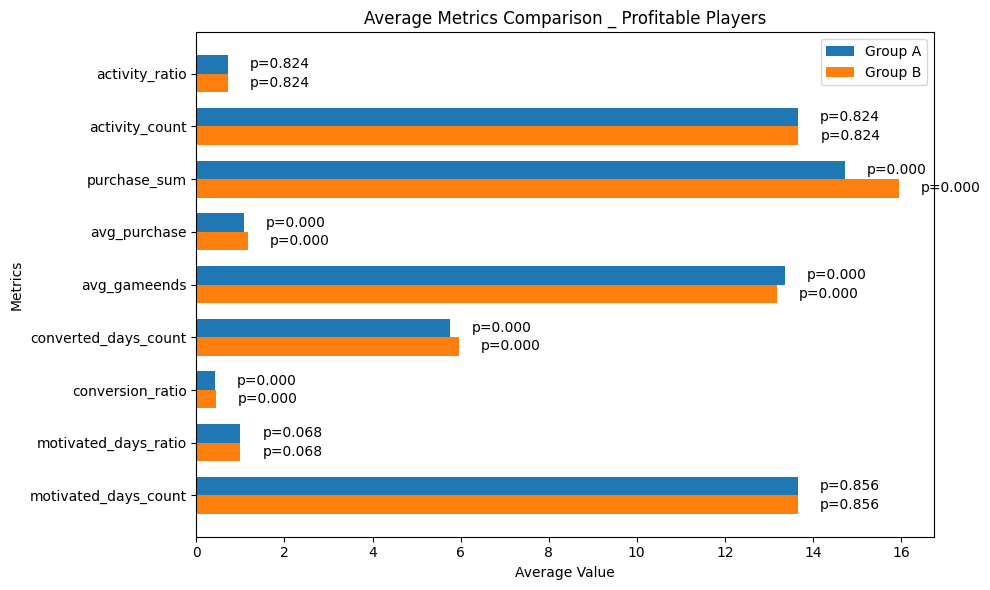

In [19]:
profitable_players = assignment_activity[
    assignment_activity.index.isin(
        historical_activity[historical_activity.avg_purchase > 0].index
    )
]
profitable_players_aggregated, profitable_players_stat_result = calc_segment_stat_test(
    profitable_players, "Profitable Players"
)

0.003988653241256267


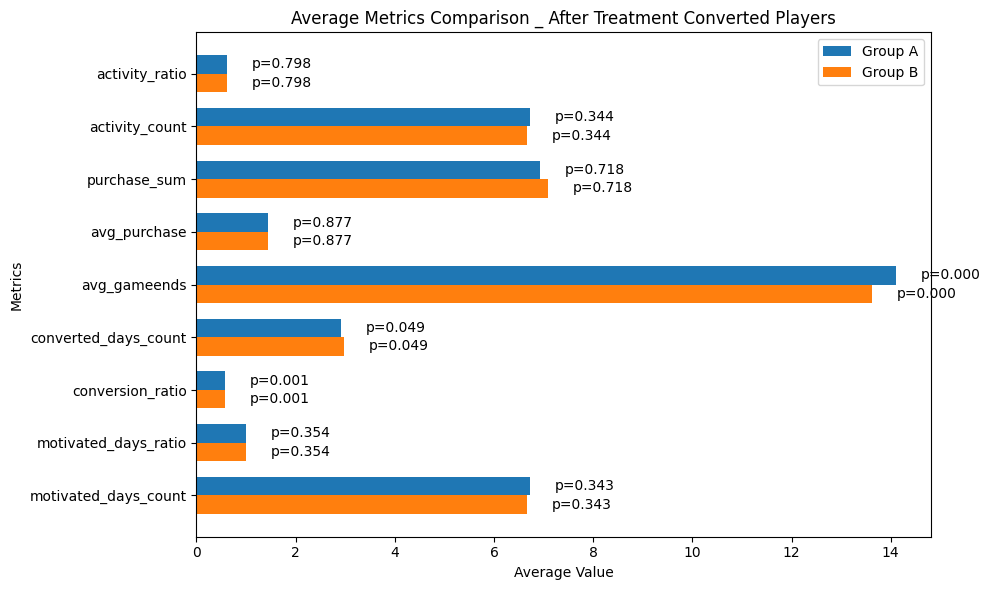

In [21]:
after_treatment_converted_players = assignment_activity[
    assignment_activity.converted_after_assignment
]
after_treatment_converted_players_aggregated, after_treatment_converted_players_stat_result = calc_segment_stat_test(
    after_treatment_converted_players, "After Treatment Converted Players"
)